In [73]:
%matplotlib inline

import sys
sys.path.append("../../../fastai/")

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [74]:
torch.cuda.is_available()

True

In [75]:
torch.backends.cudnn.enabled

True

In [76]:
# Change the folder path
PATH_DC = 'C:/Users/roh28/Desktop/Classification/CSC790-Project-master/Pictures'
print(os.listdir(f'{PATH_DC}'))

['models', 'Original', 'test', 'tmp', 'train', 'valid']


['image03.png', 'image04.png', 'image05.png', 'image06.png', 'image07.png']
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


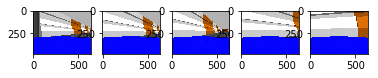

In [77]:
n=5
files = os.listdir(f'{PATH_DC}/valid/Left')[:n]
print(files)

fig,axes = plt.subplots(nrows=1,ncols=n)

for ax, img_filename in zip(axes, files):
    img = plt.imread(f'{PATH_DC}/valid/Left/{img_filename}')
    ax.imshow(img)
    print(img.shape)

In [84]:
# Resize all images to improve training
size =30

# Let's use a pre-trained model (resnet34 won the ImageNet competition) 
arch = resnet34
data =  ImageClassifierData.from_paths(PATH_DC, tfms= tfms_from_model(arch, size))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01,2)

RuntimeError: cuda runtime error (2) : out of memory at c:\anaconda2\conda-bld\pytorch_1519501749874\work\torch\lib\thc\generic/THCStorage.cu:58

In [79]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2])

In [80]:
data.classes

['Left', 'Middle', 'Right']

In [81]:
log_predictions = learn.predict()
prob_predictions = np.exp(log_predictions[:,1])

In [82]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|                                                                                 | 0/2 [00:00<?, ?it/s, loss=0.49]


RuntimeError: cuda runtime error (2) : out of memory at c:\anaconda2\conda-bld\pytorch_1519501749874\work\torch\lib\thc\generic/THCStorage.cu:58

In [83]:
learn.sched.plot_()

AttributeError: 'LR_Finder' object has no attribute 'plot_'

In [52]:
# Plot some correct images
plot_val_with_title(most_by_correct(1,True),'Correctly classified')

NameError: name 'plot_val_with_title' is not defined